In [1]:
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs

In [2]:
df=pd.read_csv("All_stocks.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low,Name
0,0,2023-03-24,160.25,59256340,158.86,160.3400,157.85,Apple
1,1,2023-03-23,158.93,67622060,158.83,161.5501,157.68,Apple
2,2,2023-03-22,157.83,75701810,159.30,162.1400,157.81,Apple
3,3,2023-03-21,159.28,73938290,157.32,159.4000,156.54,Apple
4,4,2023-03-20,157.40,73641420,155.07,157.8200,154.15,Apple


In [4]:
df['Name'].unique()

array(['Apple', 'Amazon', 'Facebook', 'Google_classA', 'Google_classC',
       'Netflix'], dtype=object)

In [5]:
apple_df = df[df['Name'] == 'Apple']
amazon_df=df[df['Name'] == 'Amazon']
facebook_df=df[df['Name'] == 'Facebook']
google_classA_df=df[df['Name'] == 'Google_classA']
google_classC_df=df[df['Name'] == 'Google_classC']
netflix_df=df[df['Name'] == 'Netflix']

In [6]:
names=[apple_df,amazon_df,facebook_df,google_classA_df,google_classC_df,netflix_df]

In [7]:
apple_df = apple_df.drop(columns=apple_df.columns.difference(['Date', 'Close']))
amazon_df = amazon_df.drop(columns=amazon_df.columns.difference(['Date', 'Close']))
facebook_df = facebook_df.drop(columns=facebook_df.columns.difference(['Date', 'Close']))
google_classA_df = google_classA_df.drop(columns=google_classA_df.columns.difference(['Date', 'Close']))
google_classC_df = google_classC_df.drop(columns=google_classC_df.columns.difference(['Date', 'Close']))
netflix_df = netflix_df.drop(columns=netflix_df.columns.difference(['Date', 'Close']))

In [8]:
dfs = [apple_df, amazon_df, facebook_df, google_classA_df, google_classC_df, netflix_df]

# Loop over the data frames and set the same column as index for each one
for df in dfs:
    df.set_index('Date', inplace=True)

In [9]:
apple_df.head()

,Close
Date,
2023-03-24,160.25
2023-03-23,158.93
2023-03-22,157.83
2023-03-21,159.28
2023-03-20,157.40


In [10]:
df_names = ["apple", "amazon", "facebook", "google_classA", "google_classC", "netflix"]

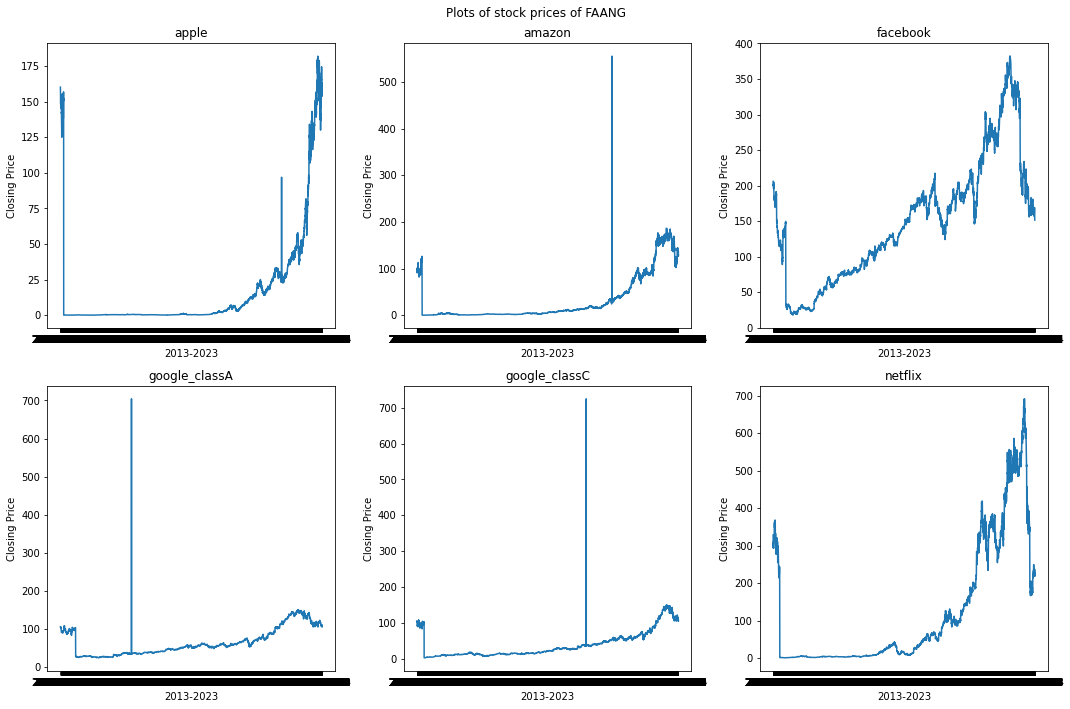

In [11]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop over the data frames and plot each one on a different subplot
for i, df in enumerate(dfs):
    row = i // 3
    col = i % 3
    axs[row, col].plot(df.index, df['Close'])
    axs[row, col].set_title('{}'.format(df_names[i]))
    axs[row, col].set_xlabel('2013-2023')
    axs[row, col].set_ylabel('Closing Price')

# Set overall plot title
fig.suptitle('Plots of stock prices of FAANG')

# Adjust subplot spacing
fig.tight_layout()

# Show the plot
plt.show()

In [12]:
def adf_test(dataframe, company):
    result = adfuller(dataframe['Close'])
    print('=========For {}========='.format(company))
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

In [13]:
dfs = [apple_df, amazon_df, facebook_df, google_classA_df, google_classC_df, netflix_df]

In [14]:
adf_test(apple_df, 'Apple')
adf_test(amazon_df, 'Amazon')
adf_test(facebook_df, 'Facebook')
adf_test(google_classA_df, 'Google_classA')
adf_test(google_classC_df ,'Google_classC')
adf_test(netflix_df, 'Netflix')

=========For Apple=========
ADF Statistic: -2.160014501156946
p-value: 0.2210764910923933
=========For Amazon=========
ADF Statistic: -1.300557854829431
p-value: 0.6289170557855915
=========For Facebook=========
ADF Statistic: -1.2882503307813684
p-value: 0.6345305114651308
=========For Google_classA=========
ADF Statistic: -1.5032593405156323
p-value: 0.5318983779870899
=========For Google_classC=========
ADF Statistic: -1.5278470129535293
p-value: 0.519693615086694
=========For Netflix=========
ADF Statistic: -1.8468719960054785
p-value: 0.3574516492872656


In [15]:
def get_degree_of_differencing(dataframe, company):
    company_ndiffs = ndiffs(dataframe['Close'], test = 'adf')
    print(f'The degree of differencing is {company_ndiffs} for {company}')
    return company_ndiffs

In [16]:
aapl_dd = get_degree_of_differencing(apple_df, 'Apple')
amzn_dd = get_degree_of_differencing(amazon_df, 'Amazon')
fcbk_dd = get_degree_of_differencing(facebook_df, 'Facebook')
googA_dd = get_degree_of_differencing(google_classA_df, 'Google class A')
googC_dd = get_degree_of_differencing(google_classC_df ,'Google class C')
ntfx_dd = get_degree_of_differencing(netflix_df, 'Netlfix')

The degree of differencing is 0 for Apple
The degree of differencing is 1 for Amazon
The degree of differencing is 1 for Facebook
The degree of differencing is 0 for Google class A
The degree of differencing is 0 for Google class C
The degree of differencing is 0 for Netlfix


In [17]:
def arima_split(dataframe, company):
    size = int(len(dataframe) * 0.95)
    train = (dataframe['Close'])[:size]
    test = (dataframe['Close'])[size:]
    
    print('=========For {}========='.format(company))
    print('Train Size: {}, Test Size: {}'.format(len(train), len(test)))
    
    return train, test

In [18]:
aapl_train, aapl_test = arima_split(apple_df, 'Apple')
amzn_train, amzn_test = arima_split(amazon_df, 'Amazon')
meta_train, meta_test = arima_split(facebook_df, 'Facebook')
googA_train, googA_test = arima_split(google_classA_df, 'Google class A')
googC_train, googC_test = arima_split(google_classC_df, 'Google class C')
ntfx_train, ntfx_test = arima_split(netflix_df, 'Netlfix')

=========For Apple=========
Train Size: 10127, Test Size: 534
=========For Amazon=========
Train Size: 6183, Test Size: 326
=========For Facebook=========
Train Size: 2594, Test Size: 137
=========For Google class A=========
Train Size: 2151, Test Size: 114
=========For Google class C=========
Train Size: 4447, Test Size: 235
=========For Netlfix=========
Train Size: 4983, Test Size: 263


In [19]:
def find_best_fit_arima(data, company):
    print('=========For {}========='.format(company))

    model = auto_arima(data, test = 'adf', 
                          start_p = 1, start_q = 1,     
                          max_p = 3, max_q = 3,
                          d = None, seasonal = True,   
                          start_P = 0, m = 3,
                          trace = True, error_action = 'ignore',  
                          suppress_warnings = True, stepwise = True,
                          D = 1, information_criterion = 'aic')

    print(model.summary())
    print('\n')
    
    return model

In [20]:
aapl_arima_model = find_best_fit_arima(aapl_train, 'Apple')
amzn_arima_model = find_best_fit_arima(amzn_train, 'Amazon')
meta_arima_model = find_best_fit_arima(meta_train, 'Facebook')
googA_arima_model = find_best_fit_arima(googA_train, 'Google class A')
googC_arima_model = find_best_fit_arima(googC_train, 'Google class C')
ntfx_arima_model = find_best_fit_arima(ntfx_train, 'Netlfix')

=========For Apple=========
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=28.96 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=50490.858, Time=0.43 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=44378.026, Time=6.14 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=47067.374, Time=6.41 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=50489.229, Time=0.30 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=46259.545, Time=1.20 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=43551.296, Time=9.46 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=44.94 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=39.96 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=50458.407, Time=8.67 sec
 ARIMA(2,0,0)(2,1,0)[3] intercept   : AIC=43521.786, Time=14.21 sec
 ARIMA(2,0,0)(1,1,0)[3] intercept   : AIC=44371.836, Time=6.96 sec
 ARIMA(2,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=55.76 sec
 ARIMA(2,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=46.15 sec
 ARIMA(2,0,1)(2

In [21]:
def check_model_params(model, company):
    print('The best parameters for {} are {}'.format(company, model))
    print('==================')
    

In [22]:
check_model_params(aapl_arima_model, 'Apple')
check_model_params(amzn_arima_model, 'Amazon')
check_model_params(meta_arima_model, 'Facebook')
check_model_params(googA_arima_model, 'Google Class A')
check_model_params(googC_arima_model, 'Google Class C')
check_model_params(ntfx_arima_model, 'Netflix')

The best parameters for Apple are  ARIMA(2,0,1)(2,1,0)[3]          
The best parameters for Amazon are  ARIMA(1,0,2)(1,1,1)[3]          
The best parameters for Facebook are  ARIMA(2,0,0)(2,1,0)[3]          
The best parameters for Google Class A are  ARIMA(0,0,2)(0,1,1)[3]          
The best parameters for Google Class C are  ARIMA(1,0,2)(1,1,1)[3]          
The best parameters for Netflix are  ARIMA(2,0,1)(2,1,0)[3]          


In [23]:
def make_predictions_and_print_rmse(model, test_data, company):
    print('=========For {}========='.format(company))
    
    forecast = model.predict(n_periods=len(test_data))   
    print('MSE: %.2f' % mean_squared_error(test_data, forecast)) 
  
    
    return forecast

In [24]:
forecast_aapl = make_predictions_and_print_rmse(aapl_arima_model, aapl_test, 'Apple')
forecast_amzn= make_predictions_and_print_rmse(amzn_arima_model, amzn_test, 'Amazon')
forecast_meta = make_predictions_and_print_rmse(meta_arima_model, meta_test, 'Facebook')
forecast_googA = make_predictions_and_print_rmse(googA_arima_model, googA_test, 'Google Class A')
forecast_googC= make_predictions_and_print_rmse(googC_arima_model, googC_test, 'Google Class C')
forecast_ntfx = make_predictions_and_print_rmse(ntfx_arima_model, ntfx_test, 'Netflix')

=========For Apple=========
MSE: 1777.26
=========For Amazon=========
MSE: 632.98
=========For Facebook=========
MSE: 1112.91
=========For Google Class A=========
MSE: 477.08
=========For Google Class C=========
MSE: 298.69
=========For Netflix=========
MSE: 60789.19


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_mode

In [44]:
def plot(train_data,test_data,predicted_data,Company):
  plt.plot(train_data.index, train_data, label='Actual (training)')
  plt.plot(test_data.index, test_data, label='Actual (test)')
  plt.plot(test_data.index, predicted_data, label='Predicted (test)')
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Stock Price')
  plt.title('{} Stock Price Prediction'.format(Company))
  plt.show()

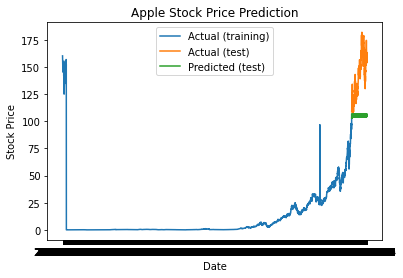

In [45]:
plot(aapl_train,aapl_test,forecast_aapl,"Apple")

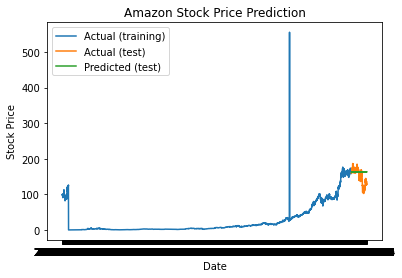

In [46]:
plot(amzn_train,amzn_test,forecast_amzn,"Amazon")

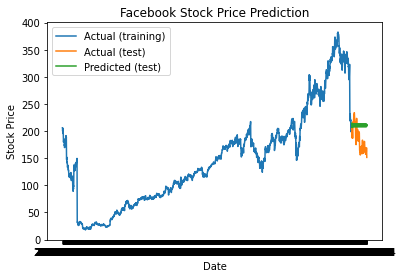

In [47]:
plot(meta_train,meta_test,forecast_meta,"Facebook")

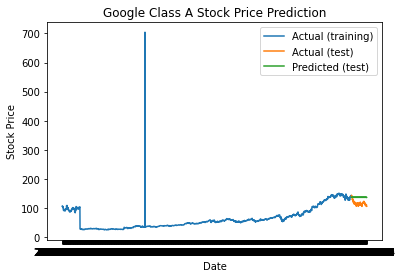

In [48]:
plot(googA_train, googA_test,forecast_googA,"Google Class A")

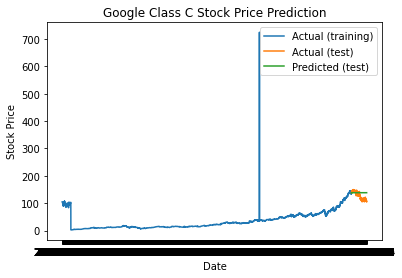

In [49]:
plot(googC_train, googC_test,forecast_googC,"Google Class C")

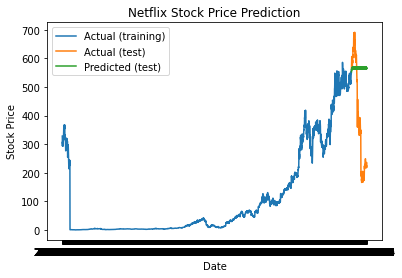

In [50]:
plot(ntfx_train, ntfx_test,forecast_ntfx,"Netflix")